In [50]:
import pickle

with open('/home/S-DD/masketeers/Test_gradientboostingclassifier_DAPI_alone-20250902-221200.pkl', mode= "rb") as f:
    DAPI_unpickled = pickle.load(f)

with open('/home/S-DD/masketeers/Test_gradientboostingclassifier_A488_alone-20250902-220221.pkl', mode = "rb") as f2:
    A488_unpickled = pickle.load(f2)

with open('/home/S-DD/masketeers/Test_gradientboostingclassifier_A568_alone-20250902-220446.pkl', mode = "rb") as f3:
    A568_unpickled = pickle.load(f3)

with open('/home/S-DD/masketeers/Test_gradientboostingclassifier_joined_dataset-20250902-220207.pkl', mode = 'rb') as f4:
    joined_data_unpickled = pickle.load(f4)

In [24]:
DAPI_unpickled.feature_importances_
A488_unpickled.feature_importances_
A568_unpickled.feature_importances_
joined_data_unpickled.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 3.94261733e-05, ...,
       8.90107772e-04, 0.00000000e+00, 0.00000000e+00])

(array([[3.710e+02, 3.700e+01, 1.600e+01, 8.000e+00, 3.000e+00, 7.000e+00,
         1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 0.000e+00,
         3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00],
        [2.330e+02, 4.700e+01, 1.700e+01, 1.000e+01, 6.000e+00, 6.000e+00,
         3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.00

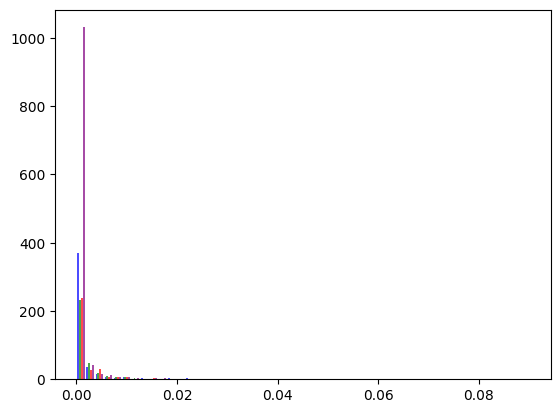

In [27]:
import matplotlib.pyplot as plt
plt.Figure(figsize=(15,6))
plt.hist(
    [DAPI_unpickled.feature_importances_, 
     A488_unpickled.feature_importances_, 
     A568_unpickled.feature_importances_,
     joined_data_unpickled.feature_importances_], 
     bins=50, 
     label=['DAPI','A488','A568','joined'], 
     alpha=0.7, 
     color=['blue', 'green', 'red', 'purple'])


Identify the feature_importances for the models

In [39]:
import pandas as pd
import numpy as np

# # Obtain paths to csv files
path_to_DAPI_csv = "/mnt/efs/aimbl_2025/student_data/S-DD/DAPI_alone.csv"
path_to_A488_csv = "/mnt/efs/aimbl_2025/student_data/S-DD/A488_alone.csv"
path_to_A568_csv = '/mnt/efs/aimbl_2025/student_data/S-DD/A568_alone.csv'
path_to_joined_csv = '/mnt/efs/aimbl_2025/student_data/S-DD/joined_data.csv'

# Read csv files to obtain column names
DAPI_column_names = pd.read_csv(path_to_DAPI_csv, header=0, index_col=[0, 1])
A488_column_names = pd.read_csv(path_to_A488_csv, header=0, index_col=[0, 1])
A568_column_names = pd.read_csv(path_to_A568_csv, header=0, index_col=[0, 1])
joined_column_names = pd.read_csv(path_to_joined_csv, header=0, index_col=[0, 1])

# Obtain feature importances from the unpickled model
feature_importances_DAPI = DAPI_unpickled.feature_importances_
feature_importances_A488 = A488_unpickled.feature_importances_
feature_importances_A568 = A568_unpickled.feature_importances_
feature_importances_joined = joined_data_unpickled.feature_importances_

# Sort feature importances and select the top10
top10_feature_importances_DAPI = np.argsort(feature_importances_DAPI)[-10:]
top10_feature_importances_A488 = np.argsort(feature_importances_A488)[-10:]
top10_feature_importances_A568 = np.argsort(feature_importances_A568)[-10:]
top10_feature_importances_joined = np.argsort(feature_importances_joined)[-10:]


# Save top10 feature importances to a dictionary
feature_importances_dict = {}

feature_importances_dict['DAPI_values'] = feature_importances_DAPI[top10_feature_importances_DAPI]
feature_importances_dict['DAPI_columns'] = DAPI_column_names.iloc[:, top10_feature_importances_DAPI]
feature_importances_dict['A488_values'] = feature_importances_A488[top10_feature_importances_A488]
feature_importances_dict['A488_columns'] = A488_column_names.iloc[:, top10_feature_importances_A488]
feature_importances_dict['A568_values'] = feature_importances_A568[top10_feature_importances_A568]
feature_importances_dict['A568_columns'] = A568_column_names.iloc[:, top10_feature_importances_A568]
feature_importances_dict['joined_values'] = feature_importances_joined[top10_feature_importances_joined]
feature_importances_dict['joined_columns'] = joined_column_names.iloc[:, top10_feature_importances_joined]


print(f"Feature_importances for DAPI model: {feature_importances_dict['DAPI_values']}, {feature_importances_dict['DAPI_columns'].columns}")
print(f"Feature_importances for A488 model: {feature_importances_dict['A488_values']}, {feature_importances_dict['A488_columns'].columns}")
print(f"Feature_importances for A568 model: {feature_importances_dict['A568_values']}, {feature_importances_dict['A568_columns'].columns}")
print(f"Feature_importances for joined model: {feature_importances_dict['joined_values']}, {feature_importances_dict['joined_columns'].columns}")

Feature_importances for DAPI model: [0.02322337 0.02386197 0.02472641 0.02584343 0.02949417 0.03027563
 0.03510485 0.04410203 0.06866508 0.079398  ], Index(['Intensity_MaxIntensity_DAPI', 'Texture_InfoMeas1_A488FBL_3_01_256',
       'Correlation_Costes_A488FBL_A568UBF', 'Intensity_MaxIntensityEdge_DAPI',
       'Intensity_LowerQuartileIntensity_A488FBL',
       'Texture_Correlation_A488FBL_3_03_256', 'Correlation_K_A568UBF_A488FBL',
       'Texture_Contrast_A568UBF_3_00_256', 'Children_A568obj_Count',
       'Correlation_Manders_A568UBF_A488FBL'],
      dtype='object')
Feature_importances for A488 model: [0.01969928 0.02005573 0.02399856 0.02615694 0.02828172 0.03879901
 0.05142944 0.06616686 0.07166358 0.08999493], Index(['AreaShape_Zernike_9_9', 'Intensity_MaxIntensity_DAPI',
       'Intensity_IntegratedIntensity_DAPI',
       'Intensity_UpperQuartileIntensity_A488FBL', 'Number_Object_Number',
       'Intensity_StdIntensityEdge_DAPI', 'Intensity_StdIntensity_A488FBL',
       'Intensi

Create csv file containing only the top10 feature_importances

In [46]:
joined_csv = pd.read_csv(path_to_joined_csv)
joined_data_top10features = joined_csv[['ImageNumber', 'ObjectNumber', 'Metadata_Treatment', 'DAPI_Intensity_MaxIntensity_DAPI',
       'DAPI_Correlation_K_A568UBF_A488FBL',
       'A568_Intensity_MinIntensity_DAPI',
       'DAPI_Correlation_Costes_A488FBL_A568UBF',
       'A488_Intensity_StdIntensityEdge_A488FBL',
       'DAPI_Intensity_LowerQuartileIntensity_A488FBL',
       'DAPI_Texture_InfoMeas1_A488FBL_3_01_256',
       'DAPI_Correlation_Manders_A568UBF_A488FBL',
       'DAPI_Children_A568obj_Count',
       'A568_Intensity_UpperQuartileIntensity_A488FBL']]

print(joined_data_top10features.shape)
print(joined_data_top10features.head())

joined_data_top10features.to_csv('joined_data_top10features.csv')

(11728, 13)
   ImageNumber  ObjectNumber Metadata_Treatment  \
0            1             1          10uMmg132   
1            1             2          10uMmg132   
2            1             3          10uMmg132   
3            1             4          10uMmg132   
4            1             5          10uMmg132   

   DAPI_Intensity_MaxIntensity_DAPI  DAPI_Correlation_K_A568UBF_A488FBL  \
0                          0.682353                            1.050101   
1                          0.560784                            0.855169   
2                          0.627451                            0.542262   
3                          0.717647                            1.168708   
4                          0.643137                            0.946107   

   A568_Intensity_MinIntensity_DAPI  DAPI_Correlation_Costes_A488FBL_A568UBF  \
0                          0.074510                                 0.989411   
1                          0.066667                                 0.

Calculate Permutation Importance

In [51]:
from sklearn.inspection import permutation_importance

""" Using model in validation mode """

import pandas as pd
import time
import typer
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

def create_pandas_df_from_csv(path_to_csv):
    if path_to_csv is None:
        print(f'No path to csv provided')
        return None
    else:    
        print(f"path to csv is {path_to_csv}")
        data_df = pd.read_csv(path_to_csv, header=0, index_col=[0, 1])
        data_df = data_df.fillna(value=0)
        print(f'dataset created')
        return data_df

def split_dataset(data_df):
    """Split the dataset into features and target."""
    X = data_df.drop(columns=['Metadata_Treatment'])
    y = data_df["Metadata_Treatment"]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42, shuffle=True)
    return x_train, x_test, x_val, y_train, y_test, y_val

# def standardize_data(x_train, x_test, x_val):
#     """Standardize the feature data."""
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(x_train)
#     X_test = scaler.transform(x_test)
#     X_val = scaler.transform(x_val)
#     return X_train, X_test, X_val

# def train_gradient_boosting(X_train, y_train):
#     """Train a gradient boosting model."""
#     #timestamp
#     t0 = time.time()
#     clf = GradientBoostingClassifier(random_state=42)
#     clf.fit(X_train, y_train)
#     clf.score(X_train, y_train)
#     y_pred_train = clf.predict(X_train)
#     report_train = classification_report(y_train, y_pred_train)
#     print("Training time:", time.time() - t0)
#     return clf, report_train, y_train, y_pred_train

# def evaluate_model(model, X_val,y_val):
#     y_pred = model.predict(X_val)
#     report_val = classification_report(y_val, y_pred)
#     return report_val, y_val, y_pred

# def save_model(model, path):
#     with open(path, 'wb') as f:
#         pickle.dump(model, f)


    # if DAPI_alone == True:
    #     path_to_csv = "/mnt/efs/aimbl_2025/student_data/S-DD/DAPI_alone.csv"
    #     dataset_list.append("DAPI_alone")

    # if A488_alone == True:
    #     path_to_csv = "/mnt/efs/aimbl_2025/student_data/S-DD/A488_alone.csv"
    #     dataset_list.append("A488_alone")

    # if A568_alone == True:
    #     path_to_csv = "/mnt/efs/aimbl_2025/student_data/S-DD/A568_alone.csv"
    #     dataset_list.append("A568_alone")

    # if joined_data == True:
    #     path_to_csv = "/mnt/efs/aimbl_2025/student_data/S-DD/joined_data.csv"
    #     dataset_list.append("joined_dataset")


    # data_df = create_pandas_df_from_csv(path_to_csv)
    # print(data_df.head())
    # print(data_df.shape)
    # permutation_importance

# Load dataframes from csv files in the same way that was done when the classifier was trained
DAPI_df = pd.read_csv(path_to_DAPI_csv, header=0, index_col=[0, 1])
DAPI_df = DAPI_df.fillna(value=0)
A488_df = pd.read_csv(path_to_A488_csv, header=0, index_col=[0, 1])
A488_df = A488_df.fillna(value=0)
A568_df = pd.read_csv(path_to_A568_csv, header=0, index_col=[0, 1])
A568_df = A568_df.fillna(value=0)
joined_df = pd.read_csv(path_to_joined_csv, header=0, index_col=[0, 1])
joined_df = joined_df.fillna(value=0)

# Split the dataset into train, val and test datasets, same way that was done when the classifier was trained
x_train_DAPI, x_test_DAPI, x_val_DAPI, y_train_DAPI, y_test_DAPI, y_val_DAPI = split_dataset(DAPI_df)
x_train_A488, x_test_A488, x_val_A488, y_train_A488, y_test_A488, y_val_A488 = split_dataset(A488_df)
x_train_A568, x_test_568, x_val_A568, y_train_A568, y_test_A568, y_val_A568 = split_dataset(A568_df)
x_train_joined, x_test_joined, x_val_joined, y_train_joined, y_test_joined, y_val_joined = split_dataset(joined_df)


# Calculate permutation importance
permutation_importance_DAPI = permutation_importance(estimator = DAPI_unpickled, X=x_val_DAPI, y=y_val_DAPI)
permutation_importance_A488 = permutation_importance(estimator = A488_unpickled, X=x_val_A488, y=y_val_A488)
permutation_importance_A568 = permutation_importance(estimator = A568_unpickled, X=x_val_A568, y=y_val_A568)
permutation_importance_joined = permutation_importance(estimator = joined_data_unpickled, X=x_val_joined, y=y_val_joined)



/home/S-DD/conda/envs/masketeers/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/home/S-DD/conda/envs/masketeers/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/home/S-DD/conda/envs/masketeers/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/home/S-DD/conda/envs/masketeers/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/home/S-DD/conda/envs/masketeers/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassi

Generate permutation importance graphs

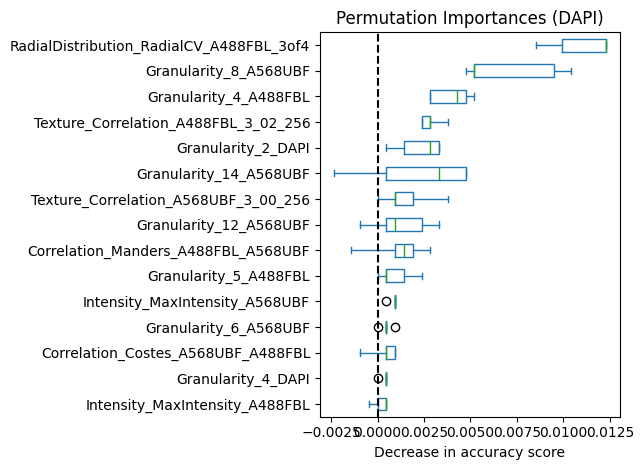

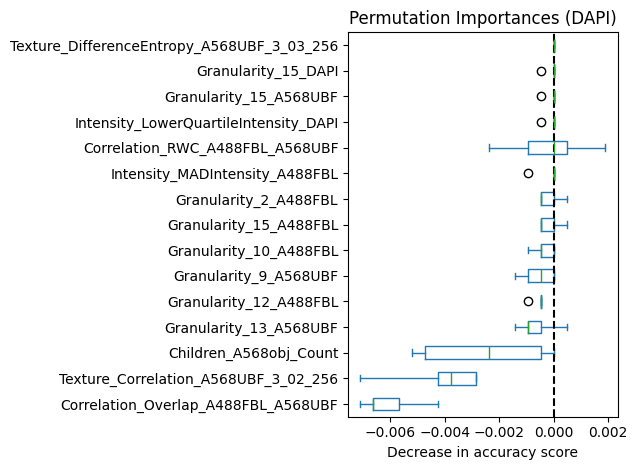

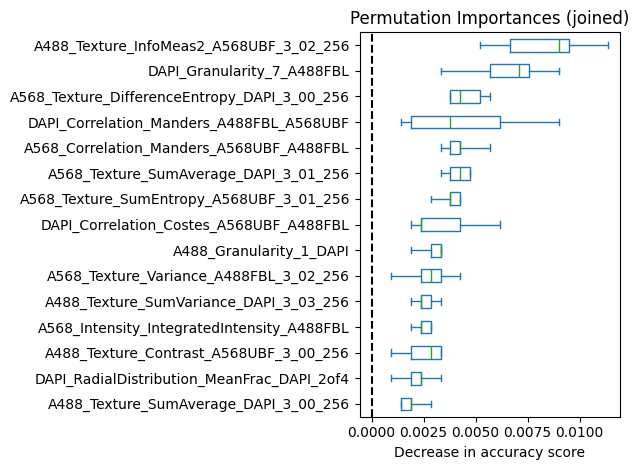

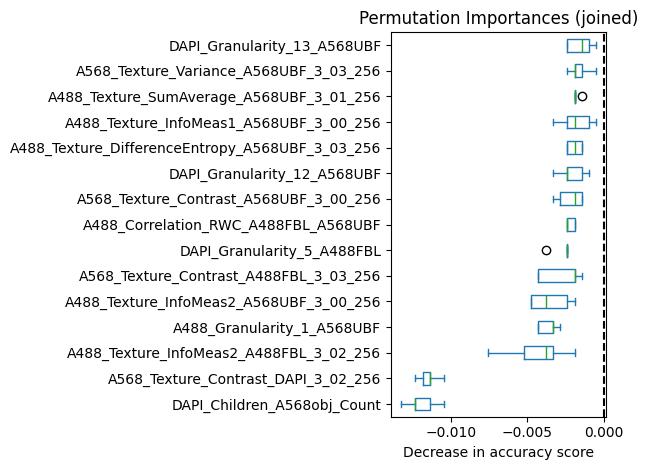

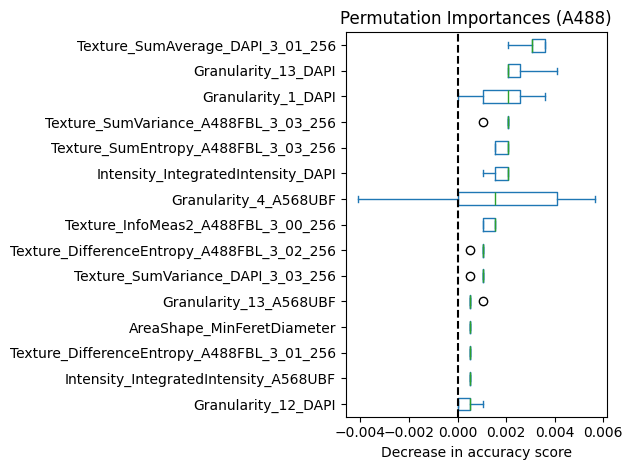

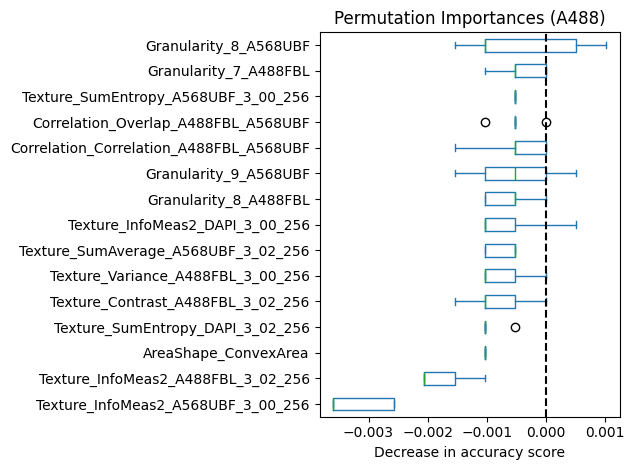

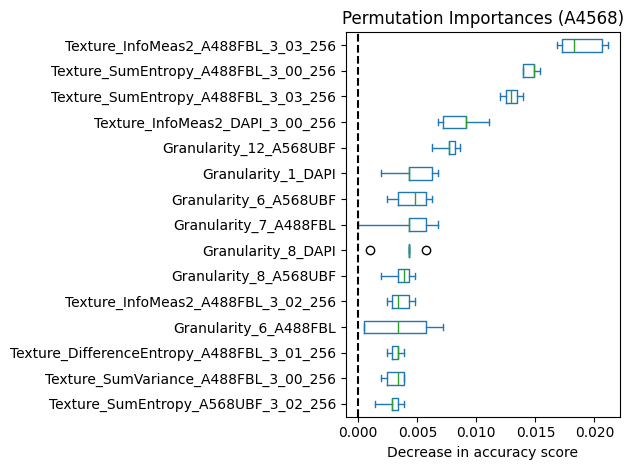

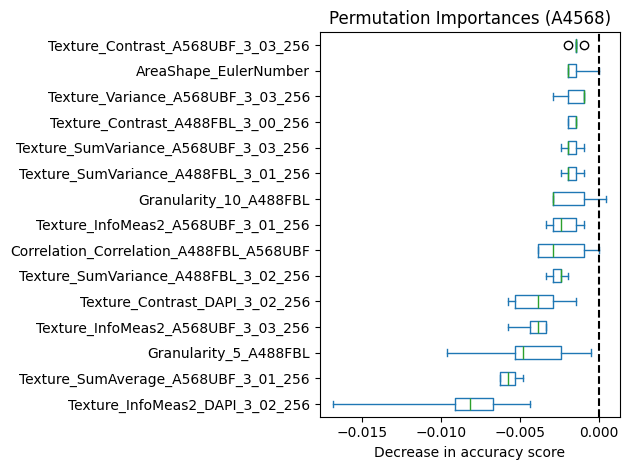

In [63]:
from sklearn.inspection import permutation_importance

# result = permutation_importance_DAPI.importances_mean
# print(result)

result=permutation_importance_DAPI

sorted_importances_idx = result.importances_mean.argsort()[-15:]
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=x_val_DAPI.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (DAPI)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

sorted_importances_idx = result.importances_mean.argsort()[:15]
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=x_val_DAPI.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (DAPI)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Graphs for joine model

joined_sorted_importances_idx = permutation_importance_joined.importances_mean.argsort()[-15:]
joined_importances = pd.DataFrame(
    permutation_importance_joined.importances[joined_sorted_importances_idx].T,
    columns=x_val_joined.columns[joined_sorted_importances_idx],
)
ax = joined_importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (joined)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#
joined_sorted_importances_idx = permutation_importance_joined.importances_mean.argsort()[:15]
joined_importances = pd.DataFrame(
    permutation_importance_joined.importances[joined_sorted_importances_idx].T,
    columns=x_val_joined.columns[joined_sorted_importances_idx],
)
ax = joined_importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (joined)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Graphs for A488 model

A488sorted_importances_idx = permutation_importance_A488.importances_mean.argsort()[-15:]
A488importances = pd.DataFrame(
    permutation_importance_A488.importances[A488sorted_importances_idx].T,
    columns=x_val_A488.columns[A488sorted_importances_idx],
)
ax = A488importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (A488)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#
A488sorted_importances_idx = permutation_importance_A488.importances_mean.argsort()[:15]
A488importances = pd.DataFrame(
    permutation_importance_A488.importances[A488sorted_importances_idx].T,
    columns=x_val_A488.columns[A488sorted_importances_idx],
)
ax = A488importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (A488)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Graphs for A568 model

A568sorted_importances_idx = permutation_importance_A568.importances_mean.argsort()[-15:]
A568importances = pd.DataFrame(
    permutation_importance_A568.importances[A568sorted_importances_idx].T,
    columns=x_val_A568.columns[A568sorted_importances_idx],
)
ax = A568importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (A4568)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#
A568sorted_importances_idx = permutation_importance_A568.importances_mean.argsort()[:15]
A568importances = pd.DataFrame(
    permutation_importance_A568.importances[A568sorted_importances_idx].T,
    columns=x_val_A568.columns[A568sorted_importances_idx],
)
ax = A568importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (A4568)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

Features in common between the Features Importances and Permutation Importances:

For DAPI model:
- 'Correlation_Costes_A488FBL_A568UBF'
- 'Texture_Correlation_A488FBL_3_03_256'
- 'Children_A568obj_Count'
- 'Correlation_Manders_A568UBF_A488FBL'

For joined model:
- 'DAPI_Correlation_Costes_A488FBL_A568UBF'
- 'DAPI_Correlation_Manders_A568UBF_A488FBL',
- 'DAPI_Children_A568obj_Count',

